## Observations and Insights 

In [98]:
#Observations
print("(1) There does appear to be a linear relationship between mouse weight and average tumor volume")
print("(2) Both Capomulin and Ramicane have more study measurements and thus, the variance, standard deviation and SEM are lower than the other drug regimens indicating less data volatility and more data confidence.")
print("(3) In the comparison of Capomulin, Infubinol, Ramicane and Ceftamin, Capomulin and Ramicane appear to be more successful treatment regimens, with lower final average tumor volumes and better statistical scores as indicated in (2) above.")
print("Capomulin appears to be a successful drug regimen based on the study in comparison to the other regimens.  The only potential competition appears to be Ramicane which had a higher IQR, but lower final average tumor volumes.")
      

(1) There does appear to be a linear relationship between mouse weight and average tumor volume
(2) Both Capomulin and Ramicane have more study measurements and thus, the variance, standard deviation and SEM are lower than the other drug regimens indicating less data volatility and more data confidence.
(3) In the comparison of Capomulin, Infubinol, Ramicane and Ceftamin, Capomulin and Ramicane appear to be more successful treatment regimens, with lower final average tumor volumes and better statistical scores as indicated in (2) above.
Capomulin appears to be a successful drug regimen based on the study in comparison to the other regimens.  The only potential competition appears to be Ramicane which had a higher IQR, but lower final average tumor volumes.


In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_preclean = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study_preclean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [100]:
# Checking the number of mice.
mouse_study_preclean["Mouse ID"].value_counts()

g989    13
a401    10
q511    10
a275    10
b128    10
        ..
t573     1
x336     1
u153     1
b447     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [101]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_timepoint = mouse_study_preclean[["Mouse ID","Timepoint"]]
mouse_dup = mouse_timepoint[mouse_timepoint.duplicated()]
mouse_dup

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [102]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup_timepoints = mouse_study_preclean.loc[mouse_study_preclean["Mouse ID"] =="g989",:]
mouse_dup_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [103]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study = mouse_study_preclean.drop(mouse_study_preclean[mouse_study_preclean['Mouse ID'] == 'g989'].index)
mouse_study.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [104]:
# Checking the number of mice in the clean DataFrame.
mouse_study["Mouse ID"].value_counts()

x773    10
a401    10
c757    10
f345    10
t718    10
        ..
t573     1
h428     1
n482     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = mouse_study.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_vol_median = mouse_study.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_vol_var = mouse_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_vol_stddev = mouse_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_vol_sem = mouse_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary dataframe.
tumor_vol_stats = pd.DataFrame({"Tumor Volume Mean":tumor_vol_mean,
                              "Tumor Volume Median":tumor_vol_median,
                              "Tumor Volume Variance":tumor_vol_var,
                              "Tumor Volume Standard Deviation":tumor_vol_stddev,
                              "Tumor Volume SEM":tumor_vol_sem})
tumor_vol_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_agg_stats = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
tumor_vol_agg_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0.5, 'Number of Measurements per Mouse'),
 Text(0.5, 0, 'Drug Regimens')]

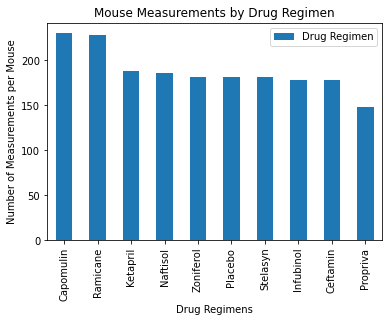

In [107]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = mouse_study["Drug Regimen"].value_counts()
measurementsbar = measurements.plot(kind="bar",title = "Mouse Measurements by Drug Regimen", legend = True)
measurementsbar.set(xlabel="Drug Regimens", ylabel="Number of Measurements per Mouse")

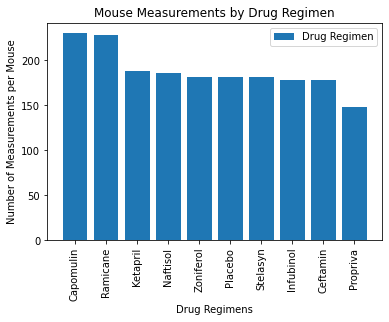

In [108]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimens = mouse_study["Drug Regimen"].value_counts().index
plt.bar(regimens,measurements, align = "center", label="Drug Regimen")
plt.title("Mouse Measurements by Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements per Mouse")
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

Male      958
Female    922
Name: Sex, dtype: int64

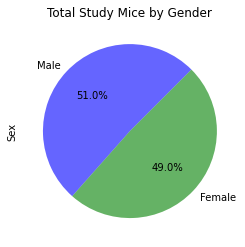

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ["Female","Male"]
mouse_study["Sex"].value_counts().plot(kind='pie', autopct = "%1.1f%%", startangle = 45, colors = ["blue","green"],
                                       wedgeprops={'alpha':0.60}, title = "Total Study Mice by Gender")
mouse_study['Sex'].value_counts()

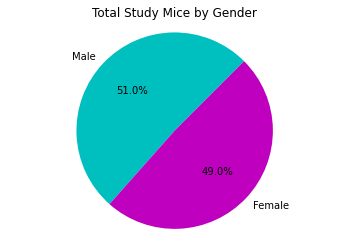

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
gender_split = mouse_study["Sex"].value_counts()
colors = ["c", "m"]
plt.pie(gender_split, labels = labels, colors = colors, autopct = "%1.1f%%", startangle = 45)
plt.axis("equal")
plt.title("Total Study Mice by Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint.reset_index()
mouse_study_vol = pd.merge(last_timepoint, mouse_study, on=["Mouse ID", "Timepoint"], how="left")

mouse_study_vol.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [112]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_options = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and qutantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
for regimen in regimen_options:
    final_tumor_vol = mouse_study_vol.loc[mouse_study_vol["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]    
    tumor_vol_list.append(final_tumor_vol) 

    quartiles = final_tumor_vol.quantile([0.25,0.75])
    print(f"The lower and upper quartiles for {regimen} are {quartiles}") 
    
    iqr = quartiles[0.75] - quartiles[0.25]
    print(f"The interquartile range for {regimen} is {iqr}")
   
    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)
    print(f"For {regimen}, the Lower Bound is {lower_bound} and the Upper Bound is {upper_bound}")
    
    outliers = final_tumor_vol.loc[(final_tumor_vol<lower_bound)|(final_tumor_vol>upper_bound)] 
    print("The following outliers are present:")
    print(outliers)
print(f"\033[1m There is one outlier.  The tumor volume measurement of 36.321346 from Infubinol is below the lower_bound.")


The lower and upper quartiles for Capomulin are 0.25    32.377357
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
The interquartile range for Capomulin is 7.781863460000004
For Capomulin, the Lower Bound is 20.70456164999999 and the Upper Bound is 51.83201549
The following outliers are present:
Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower and upper quartiles for Ramicane are 0.25    31.560470
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
The interquartile range for Ramicane is 9.098536719999998
For Ramicane, the Lower Bound is 17.912664470000003 and the Upper Bound is 54.30681135
The following outliers are present:
Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower and upper quartiles for Infubinol are 0.25    54.048608
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
The interquartile range for Infubinol is 11.477135160000003
For Infubinol, the Lower Bound is 36.83290494999999 and the Upper Bound is 82.74144559000001
The 

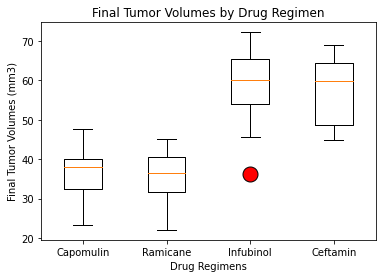

In [113]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='red', markersize=15, markeredgecolor='black')
ax1.boxplot(tumor_vol_list, flierprops = flierprops)
ax1.set_title("Final Tumor Volumes by Drug Regimen")
ax1.set_ylabel("Final Tumor Volumes (mm3)")
ax1.set_xlabel("Drug Regimens")
ax1.set_xticklabels(regimen_options)
plt.show()

## Line and Scatter Plots

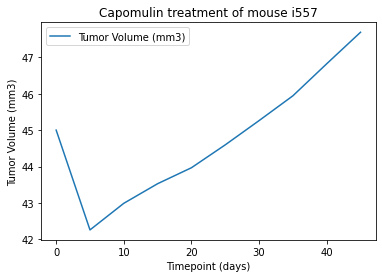

In [114]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capmouse = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"] 
mymousepick = capmouse.loc[capmouse["Mouse ID"]=="i557"]
mymousepick.plot(x="Timepoint",y="Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse i557")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

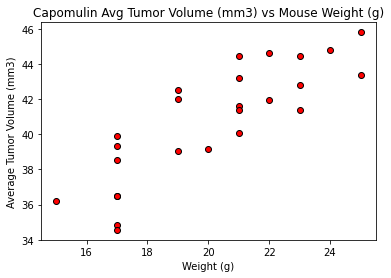

In [115]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
xaxis = capmouse.groupby("Mouse ID").max()["Weight (g)"]
yaxis = capmouse.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
plt.scatter(xaxis,yaxis,marker = "o",facecolors = "red", edgecolors = "black")
plt.title("Capomulin Avg Tumor Volume (mm3) vs Mouse Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight (g) and average tumor volume is 0.84


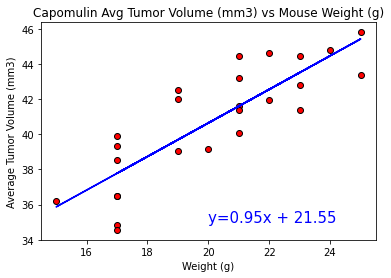

In [116]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight (g) and average tumor volume is {round(st.pearsonr(xaxis,yaxis)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis,yaxis,marker = "o",facecolors = "red", edgecolors = "black")
plt.plot(xaxis,regress_values, "b-")
plt.annotate(line_eq,(20,35),fontsize=15, color="blue")
plt.title("Capomulin Avg Tumor Volume (mm3) vs Mouse Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()